
# Projet d'Analyse des Données Astronomiques

## Énoncé du projet

Ce projet vise à analyser et modéliser des données astronomiques issues de l'observation des lunes, planètes, soleils et astéroïdes. 
L'objectif est d'explorer ces données pour :
- Comprendre les relations entre les caractéristiques physiques des objets célestes.
- Construire un modèle prédictif capable de classifier ou prédire certains attributs des objets.

### Étapes principales :
1. **Importation et exploration des données** : Charger et analyser les structures principales des jeux de données.
2. **Prétraitement des données** : Nettoyage et préparation des données pour les analyses ultérieures.
3. **Analyse exploratoire** : Identifier les relations et tendances via des visualisations.
4. **Modélisation et évaluation** : Construire un modèle de machine learning pour des prédictions ou classifications spécifiques.
5. **Conclusions et perspectives** : Synthétiser les résultats et proposer des axes d'amélioration.



In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import warnings
import matplotlib.pyplot as plt # type: ignore
import tensorflow as tf # type: ignore
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
# from sklearn.preprocessing import LabelEncoder,StandardScaler
#from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, HTML # Pour afficher les données dans Jupyter Notebook avec un format HTML
# ***********************   Librairie personnelle  **************************************
from utils import process_and_plot_graphs2,print_evaluate,evaluate,prepare_data_graph
from EcritureCSV import create_csv
from DataProcessing import Nbr_Moons2,get_unique_planet_types
from KNN import KNN_Classifier,KNN_Classifier_Smote2
from RandomForest import RF_PCA2,RF_PCA_SMOTE,RF_SMOTE,RF_SMOTE2
from Evetools import TriData
from DeepLearning import Deep

ValeurRandom = 42

warnings.filterwarnings('ignore')

# Configuration globale pour pandas
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes
pd.set_option('display.max_rows', None)     # Afficher toutes les lignes
pd.set_option('display.width', 500)       # Largeur totale (éviter retour à la ligne)
pd.set_option('display.colheader_justify', 'left')  # Alignement à gauche des en-têtes
# Augmenter la largeur de la cellule dans Jupyter
display(HTML("<style>.container { width:100% !important; }</style>"))
 


## Importation et exploration des données

### Objectif :
Charger les données brutes et examiner leurs structures, dimensions, et caractéristiques globales.

### Méthodologie :
1. Charger les données à partir de `EveDataAI.csv` en utilisant des bibliothèques Python.
2. Diviser les données en catégories principales :
    - **df_moon** : Données sur les lunes.
    - **df_planet** : Données sur les planètes.
    - **df_sun** : Données sur les soleils.
    - **df_asteroid** : Données sur les astéroïdes.
3. Inspecter les colonnes, les valeurs manquantes et les types de données.

### Résultat attendu :
Une compréhension globale des données disponibles et leur organisation.


In [2]:
# Lecture des données à partir du fichier 'EveDataAI.csv'
tri_data = TriData('EveDataAI.csv')

# Séparation des données en quatre DataFrames :
# - df_moon : données relatives aux lunes.
# - df_planet : données relatives aux planètes.
# - df_sun : données relatives au soleil.
# - df_asteroid : données relatives aux astéroïdes.
df_moon, df_planet, df_sun, df_asteroid = tri_data.get_dataframes()

# Option : Sauvegarde des DataFrames dans des fichiers CSV pour analyse future
# Par exemple, sauvegarde des données concernant le soleil (df_sun)
# create_csv(df_sun, "df_sun.csv")

# Prétraitement des données des lunes (df_moon) :
# Suppression des colonnes inutiles 'spectralClass' (classe spectrale) et 'life' (vie) car non pertinentes pour l'analyse.
df_moon = df_moon.drop(columns=['spectralClass', 'life'], errors='ignore')

# Option : Sauvegarde des données prétraitées des lunes dans un fichier CSV
# create_csv(df_moon, "df_moon.csv")

# Prétraitement des données des planètes (df_planet) :
# Suppression de la colonne 'spectralClass' car elle n'apporte pas d'information utile à ce stade.
df_planet = df_planet.drop(columns=['spectralClass'], errors='ignore')
df_type_planet = get_unique_planet_types(df_planet)

# Sauvegarde des données prétraitées des planètes dans un fichier CSV.
#create_csv(df_planet, "df_planet.csv")

# Prétraitement des données des astéroïdes (df_asteroid) :
# Suppression des colonnes 'spectralClass' et 'life' car elles ne sont pas pertinentes pour l'analyse des astéroïdes.
df_asteroid = df_asteroid.drop(columns=['spectralClass', 'life'], errors='ignore')

# Option : Sauvegarde des données prétraitées des astéroïdes dans un fichier CSV
# create_csv(df_asteroid, "df_asteroid.csv")


✅ Colonne 'spectralClass' convertie en numérique.
✅ Colonne 'massDust' convertie en numérique.


 Affichage du dataset Moon   : On regarde la distribution pour toutes les lunes entre la densité et rayon afin de voir la distribution des valeurs sur l'ensemble du dataset


In [7]:

SystemMoonEchantillon = df_moon

plot = SystemMoonEchantillon.hvplot.scatter(x='radius', y='density',label ='density').opts(xrotation=90,yaxis='left',color='blue')
plot


:Scatter   [radius]   (density)

Étude de la corrélation entre la densité et le rayon des lunes d'un système solaire

Introduction :
L'objectif de cette étude est de déterminer si la répartition du ratio densité-rayon dans un système solaire suit une distribution aléatoire ou si elle obéit à une certaine logique mathématique.

Pour ce faire, nous travaillerons uniquement sur des données relatives aux lunes. Dans un premier temps, nous nous concentrerons sur les systèmes planétaires possédant plus de 7 lunes. Ensuite, nous sélectionnerons quelques exemples pour analyser si une logique sous-jacente peut être identifiée.

Pour cela nous identifier dans notre dataset, les systèmes solaire ayant plus de 7 lunes (choix impirique, mais qui donne suffisament de point pour une étude).



In [8]:
SystemMoonEchantillon = df_moon
create_csv(SystemMoonEchantillon,'SystemMoonEchantillon.csv')
# création d'une dataframe pour les lunes qui donne le système et le nombre de lunes par planète
Moons = Nbr_Moons2(SystemMoonEchantillon)
# On filtre les lunes qui ont plus de 7 lunes
filtered_moons = Moons[Moons['MoonCount'] > 7]
# On affiche les données des 20 premières lunes ayant plus de 7 lunes
print(filtered_moons.head(20))
# On choisit plusieurs systèmes pour lesquels on veut afficher les lunes
# Jark V avec 18 lunes
# Akpivem III avec 8 lunes
# Sasta VIII avec 22 lunes
# Abai IV avec 16 lunes
# Chidah V avec 10 lunes

Graph1_Moons_Name = ['Jark V','Akpivem III','Sasta VIII','Abai IV','Chidah V']
# Préparation des données pour le graphique
Graph_Moons_Dict = {}
Label_Curve_Dict = {}
for i,name in enumerate(Graph1_Moons_Name,start=1):
    pattern = rf'\b{name}\b'
    Graph_Moons_Dict[f'Graph{i}_Moons'] = SystemMoonEchantillon[
    SystemMoonEchantillon['itemName'].str.contains(pattern, case=False, na=False)] 
    Label_Curve_Dict[f'{i}'] = name
# on crée un graphique du système planétaire Chidah V afin de voir la répartion de ces lunes dans un graphique.
Graph_Moons_Dict['Graph1_Moons'].hvplot.scatter(x='radius', y='density',label =Label_Curve_Dict[str(i)]).opts(xrotation=90,yaxis='left',color='blue',height=600,width=1200,fontsize={'title': 15, 'labels': 10, 'xticks': 15, 'yticks': 10})

   System   Planet  MoonCount
2    Aakari    IX   23       
6    Aakari  VIII   22       
8    Aakari    XI   10       
16  Abagawa   VII   18       
20     Abai    IV   16       
21     Abai    IX   20       
23     Abai    VI   19       
24     Abai   VII   22       
32    Aband    IV   21       
33    Aband     V   12       
38    Abath    VI   21       
39    Abath   VII   23       
40    Abath  VIII    9       
41  Abenync     I   16       
45     Abha   VII   17       
51    Abhan     V   19       
52    Abhan   VII   18       
57    Abrat    IV   14       
60    Abrat   VII   23       
63  Abudban    IX   20       


:Scatter   [radius]   (density)

Suite au graphique du système de Chidah V, il semble qu'une relation polynomiale se dessine. Pour vérifier cette hypothèse, nous allons représenter l'ensemble de notre échantillonnage sur un graphique en utilisant une distribution polynomiale de degré 4 (valeur déterminée après essais).

Je rappelle que l'ensemble des systèmes solaires a été sélectionné de manière aléatoire.


In [9]:
plot = process_and_plot_graphs2(Graph_Moons_Dict, Label_Curve_Dict,4)
plot

Standard déviation Jark V : 2.007037669184284

Standard déviation Akpivem III : 1.5803164096886422

Standard déviation Sasta VIII : 5.710702696119776

Standard déviation Abai IV : 1.6281038294270174

Standard déviation Chidah V : 0.6995303362597965



:Overlay
   .Scatter.Jark_V                                                                      :Scatter   [radius]   (density)
   .Curve.Polyno_colon_Jark_V_Std_dév_full_stop_colon_2_full_stop_007037669184284       :Curve   [radius]   (density)
   .Scatter.Akpivem_III                                                                 :Scatter   [radius]   (density)
   .Curve.Polyno_colon_Akpivem_III_Std_dév_full_stop_colon_1_full_stop_5803164096886422 :Curve   [radius]   (density)
   .Scatter.Sasta_VIII                                                                  :Scatter   [radius]   (density)
   .Curve.Polyno_colon_Sasta_VIII_Std_dév_full_stop_colon_5_full_stop_710702696119776   :Curve   [radius]   (density)
   .Scatter.Abai_IV                                                                     :Scatter   [radius]   (density)
   .Curve.Polyno_colon_Abai_IV_Std_dév_full_stop_colon_1_full_stop_6281038294270174     :Curve   [radius]   (density)
   .Scatter.Chidah_V                                                                    :Scatter   [radius]   (density)
   .Curve.Polyno_colon_Chidah_V_Std_dév_full_stop_colon_0_full_stop_6995303362597965    :Curve   [radius]   (density)

Conclusion de l'analyse des lunes : Il est intéressant de noter qu'il existe une relation mathématique significative entre le rayon (radius) et la densité. Cela tend à démontrer que les données ne sont pas aléatoires.

Nous allons donc pousser l'analyse sur les Planètes afin de voir ce qu'il est possible d'analyser.

# *****************************************************************************************************************************************************

Début de l'anayse des Planètes :

Il existe plusieurs type de planète dans notre dataset, afin de confirmer le fait que ces données ne sont pas complètement aléatoire, nous allons faire un graphique pour voir si le dispatching des planètes de même type a une répartition aléatoire ou pas.

On regarde si la répartition des données radius, gravity par type de planète à un sens. Voir si il est possible que cela représente des clusters de planète type.
On prendra en analyse des types de planète ayant des caractéristiques très opposées pour valider.

Planète de type : Lava , Gas , Ice la density doit être très différente


In [10]:
# Copie du set de données
#df_planet_gas,df_planet_lava,df_planet_ice = df_planet,df_planet,df_planet
# On filtre les données

Graph1 = prepare_data_graph(df_planet,'Gas','radius','density')
Graph2 = prepare_data_graph(df_planet,'Lava','radius','density')
Graph3 = prepare_data_graph(df_planet,'Ice','radius','density')

desc_graph1 = Graph1.describe().add_prefix('Gas_')
desc_graph2 = Graph2.describe().add_prefix('Lava_')
desc_graph3 = Graph3.describe().add_prefix('Ice_')

# Combine into a single DataFrame
comparison = pd.concat([desc_graph1, desc_graph2, desc_graph3], axis=1)

# Display the comparison
print(comparison)
# Create scatter plots
scatter_gas = Graph1.hvplot.scatter(x='radius', y='density', label='Gas Density', color='blue').opts(xrotation=90, yaxis='left')
scatter_lava = Graph2[['radius', 'density']].hvplot.scatter(x='radius', y='density', label='Lava Density', color='red').opts(xrotation=90, yaxis='left')
scatter_ice = Graph3[['radius', 'density']].hvplot.scatter(x='radius', y='density', label='Ice Density', color='green').opts(xrotation=90, yaxis='left')
# Combine the three plots
combined_plot = scatter_gas * scatter_lava  * scatter_ice

# Show the combined plot
combined_plot
# sns.pairplot(SystemPlaneteEchantillon, hue='TypeCoreName')

       Gas_radius    Gas_density   Lava_radius   Lava_density  Ice_radius    Ice_density
count  2.026200e+04  20262.000000  6.611000e+03  6611.000000   3.324000e+03  3324.000000
mean   3.556902e+07   1697.867165  3.986743e+06  4427.939226   1.938177e+07  2686.974149
std    2.568210e+07    544.047623  2.141716e+06  1033.735547   1.596534e+07  1330.798921
min    4.212890e+06    420.702980  1.440000e+06  1899.324145   1.048578e+06   424.139800
25%    1.798000e+07   1295.014895  2.440000e+06  3575.526073   1.041000e+07  1740.240371
50%    2.637500e+07   1678.104800  3.360000e+06  4262.123609   1.460000e+07  2266.660000
75%    4.333000e+07   2109.314709  4.850000e+06  5156.452105   2.238250e+07  3424.765725
max    1.592700e+08   4108.390000  2.145710e+07  7348.420000   1.386100e+08  6644.213467


:Overlay
   .Scatter.Gas_Density  :Scatter   [radius]   (density)
   .Scatter.Lava_Density :Scatter   [radius]   (density)
   .Scatter.Ice_Density  :Scatter   [radius]   (density)

On peut voir qu'il existe bien zone de forte densité pour chaques type de planète. Nous allons donc utiliser les méthodes de classification pour voir si un modèle peut-être utilisé pour déterminer le type de planète en fonction de paramètre disponible dans le dataset. 

Pour ce faire nous allons utilisés trois méthodes :

    * K-NN en Classification
    * Random Forest
    * Deep Learning


Implémentation de la méthode K-NN

L'objectif est de déterminer si nous pouvons classifier correctement le type de planète en fonction des caractéristiques physiques disponibles dans le fichier de données de base. Pour ce faire, nous allons suivre ces étapes principales :

    Définition de la cible (YY) :
        La colonne contenant le type de planète (TypeCoreName) sera utilisée comme variable cible.
        Cette colonne sera encodée (conversion alphanumérique en numérique) pour être compatible avec les algorithmes de machine learning.

    Sélection des caractéristiques (XX) :
        Nous allons retenir les colonnes suivantes comme caractéristiques explicatives :
            temperature, density, surfaceGravity, radius, et escapeVelocity.
        Ces variables ont été sélectionnées en raison de leur pertinence physique pour différencier les types de planètes.

    Réduction de la dimensionnalité avec PCA :
        Nous appliquerons une Analyse en Composantes Principales (PCA) pour réduire la dimensionnalité tout en conservant 95 % de la variance totale des données.
        Cela permet d’éliminer les redondances dans les données et de simplifier les calculs.

    Classification avec K-NN :
        Nous utiliserons un modèle KK-Nearest Neighbors (K-NN) pour effectuer la classification.
        Une recherche par validation croisée sera réalisée pour optimiser les hyperparamètres du modèle :
            Le nombre de voisins (kk),
            La métrique de distance (euclidienne, Manhattan, Minkowski),
            Le type de pondération (uniforme ou basée sur la distance).

    Évaluation des performances :
        Nous mesurerons les performances du modèle avec les métriques standard : précision globale, rappel, f1-score pour chaque type de planète.
        L’objectif est d’évaluer la capacité du modèle à distinguer les différents types de planètes.
        Graphique : Confusions matrix, Learning curve, Probability distributions by class

In [3]:
#for j in (5,26,5):
#   for i in np.arange(0.55, 0.95 + 0.05, 0.1):
Valeur_CV =3        # Nombre de cross validation
Variance = 0.95         # Variance pour le PCA
Echantillon_min = 100   # nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
PCA_State = False     # Choix si le PCA est utilisé ou pas permet de comparer l'effet du PCA sur l'accuracy
Y_Target = 'TypeCoreName' # Analyse du type de planète
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust', 'density', 'escapeVelocity'] # Paramètre pris en compte pour le training 
neighbor_max = 50     # Nombre de voisin pour le KNN
Save_Model = True       # Sauvegarde du modèle

# Grouper par 'TypeCoreName' et compter les occurrences de chaque type
typecore_count = df_planet['TypeCoreName'].value_counts()
typecore_table = typecore_count.to_frame().T  # Vision Horizontal
print(typecore_table)

KNN_Classifier(df_planet,Echantillon_min,Valeur_CV,Variance,X_Chara,Y_Target,PCA_State,neighbor_max,Save_Model) 


TypeCoreName  Planet (Gas)  Planet (Barren)  Planet (Temperate)  Planet (Lava)  Planet (Storm)  Planet (Ice)  Planet (Oceanic)  Planet (Plasma)  Planet (Shattered)  Planet (Scorched Barren)
count         20262         19714            7200                6611           5569            3324          3036              1531             713                 1                       
Classes encodées : ['Planet (Barren)', 'Planet (Gas)', 'Planet (Ice)', 'Planet (Lava)', 'Planet (Oceanic)', 'Planet (Plasma)', 'Planet (Shattered)', 'Planet (Storm)', 'Planet (Temperate)']


KeyboardInterrupt: 

Observation sur KNN en classification :

On peut observer un sur entrainement la différence entre accuracy et le training accuracy et trop importante, même en modifiant les paramètres de variance et cv. La différence n'est pas flagrante. Je pense que l'un des soucis vient aussi du nombre trop restraint de donnée dans mon dataset. 

Néantmoins on peut quand même en tirer des enseignements, la Matrix de confusion donne une idée clair des types de planètes ayant une bonne prédiction. 

    Très Bonne prédiction : Planète Lava, Shattered, Gas 
    
    Après pour les autres catégorie, on peut observer des erreurs sur leur classification :

        Barren  : une partie du set a été déterminé comme Temperate
        Ice     : La plus grande partie du dataset est prédit dans Gas et non pas dans Ice
        Oceanic : La prédiction est splitter en principalement 3 catégories : Barren , Oceanic, Temperate
        Etc ... 

On attends un peu la limite du K-NN avec le set de donnée disponible. Il faudrait soit plus de donnée soit plus de paramètre déterminant pour améliorer l'analyse avec ce modèle.

  

L'historique des simulations et des entrainements sont disponible dans le répertoire KNN

**************************************************************************************************************************


Fonction pour traiter un type de planète, effectuer l'entraînement K-NN avec gestion des données déséquilibrées grâce à SMOTE, et afficher les résultats.

Cette méthode utilise SMOTE (Synthetic Minority Oversampling Technique) pour équilibrer les classes avant d'entraîner un modèle K-Nearest Neighbors. SMOTE génère des exemples synthétiques pour les classes minoritaires afin d'améliorer les performances du modèle sur des ensembles de données déséquilibrés.

Parameters:
- data: Le DataFrame contenant toutes les planètes avec leurs caractéristiques.
- Echantillon_min: Nombre minimal de données pour traiter un type de planète (filtrage des classes peu représentées).
- Value_cv: Nombre de validations croisées pour GridSearch afin de trouver les meilleurs hyperparamètres.
- variance: Pourcentage de variance expliquée à conserver lors de la réduction dimensionnelle avec PCA.
- X_Chara: Liste des caractéristiques explicatives (features).
- Y_Target: Nom de la colonne cible (target).
- PCA_State: Booléen indiquant si PCA (réduction dimensionnelle) est utilisé ou non.
- neighbor_max: Nombre maximum de voisins à tester pour la recherche de k optimal dans K-NN.
- Save_Model: Booléen indiquant si le modèle et les résultats doivent être sauvegardés.

Étapes principales:
1. Les classes avec un nombre insuffisant d'exemples (< Echantillon_min) sont filtrées.
2. Les données sont normalisées avec StandardScaler.
3. SMOTE est appliqué pour rééquilibrer les classes dans l'espace des caractéristiques d'origine.
4. Si PCA_State est activé, les données rééquilibrées sont réduites à une dimensionnalité inférieure en conservant un pourcentage donné de variance.
5. Recherche des meilleurs hyperparamètres pour K-NN via validation croisée et GridSearch.
6. Évaluation des performances avec des métriques comme accuracy, matrice de confusion, courbes d'apprentissage, etc.
7. Optionnel: Sauvegarde des modèles, des paramètres et des graphiques générés.

Remarque:
L'application de SMOTE avant PCA garantit que les données synthétiques reflètent les relations dans l'espace des caractéristiques d'origine. Cela évite que les composantes principales réduisent la pertinence des données équilibrées.



TypeCoreName  Planet (Gas)  Planet (Barren)  Planet (Temperate)  Planet (Lava)  Planet (Storm)  Planet (Ice)  Planet (Oceanic)  Planet (Plasma)  Planet (Shattered)  Planet (Scorched Barren)
count         20262         19714            7200                6611           5569            3324          3036              1531             713                 1                       



Classes encodées : ['Planet (Barren)', 'Planet (Gas)', 'Planet (Ice)', 'Planet (Lava)', 'Planet (Oceanic)', 'Planet (Plasma)', 'Planet (Shattered)', 'Planet (Storm)', 'Planet (Temperate)']
----------------  Répartition Données après SMOTE --------------

TypeCoreName  Planet (Lava)  Planet (Temperate)  Planet (Barren)  Planet (Oceanic)  Planet (Gas)  Planet (Ice)  Planet (Storm)  Planet (Plasma)  Planet (Shattered)
count         16176          16176               16176            16176             16176         16176         16176           16176            16176             
Nombre de composantes principales 

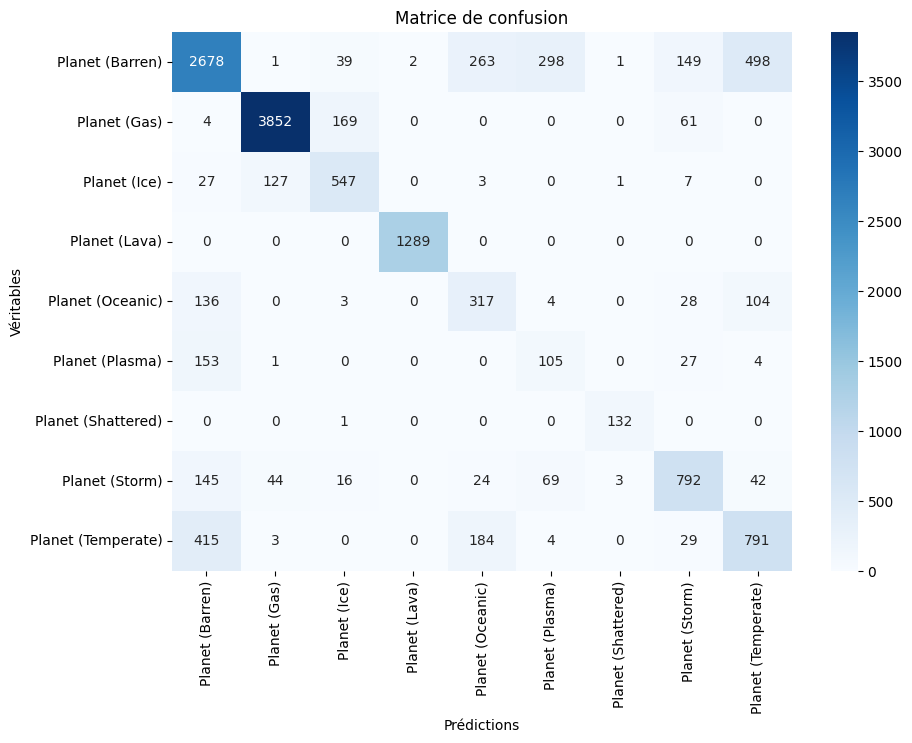

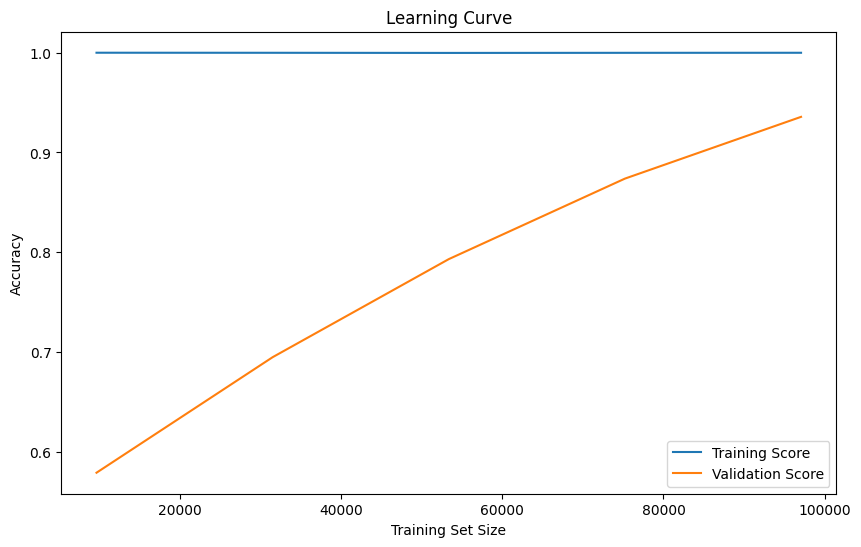

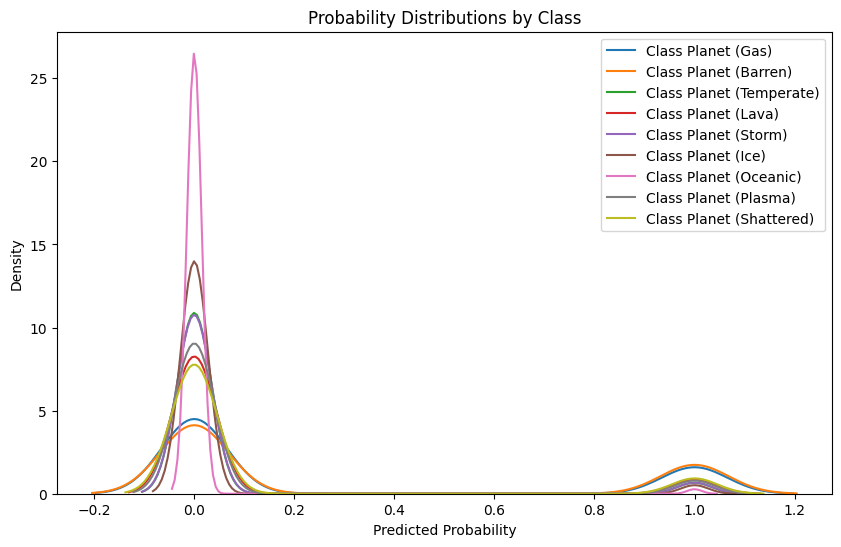

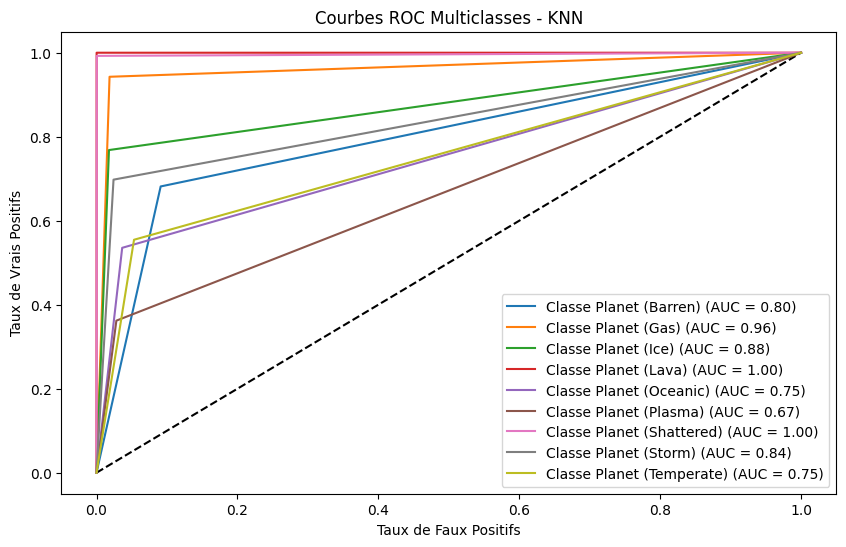

Fichiers sauvegardés dans KNN\With-PCA-CV=3-Variance=0.95-2025-01-06_13-06-39.zip
Base de données 'data.db' ouverte avec succès dans 'g:\python\Eve projet\Certification XXV\data.db'.
Table 'knn_data' créée ou déjà existante.
Données insérées avec succès dans la table knn_data.


In [5]:
# -------------------- Paramètre pour traning ---------------------------------
#for j in (5,26,5):
#   for i in np.arange(0.55, 0.95 + 0.05, 0.1):
Valeur_CV =3
Variance = 0.95
Echantillon_min = 100  # nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
PCA_State = True # Choix si le PCA est utilisé 
Y_Target = 'TypeCoreName' # Analyse du type de planète
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust', 'density', 'escapeVelocity'] # Paramètre pris en compte pour le training 
neighbor_max = 20           # Nombre de voisin pour le KNN
sampling_number = 7200      # Nombre d'échantillon pour la classe minoritaire 
sampling_strategy = False   # si True limitation du sampling min à "sampling_number" afin diminuer le nombre d'élément généré pour la classe minoritaire, si False auto s'applique
Save_Model = True

# Grouper par 'TypeCoreName' et compter les occurrences de chaque type
typecore_count = df_planet['TypeCoreName'].value_counts()
typecore_table = typecore_count.to_frame().T  # Vision Horizontal
print(typecore_table)
print(f"\n\n")

KNN_Classifier_Smote2(sampling_number,sampling_strategy,df_planet,Echantillon_min,Valeur_CV,Variance,X_Chara,Y_Target,PCA_State,neighbor_max,Save_Model) 


On observe une amélioration de l'accuracy, mais au détriment de certains recalls, comme pour les planètes de type Barren. Il me semble que l'ajout de données améliore la détection de certaines planètes au détriment des autres, ce qui n'était pas l'objectif initialement recherché. Néanmoins, il faut admettre que l'amélioration globale du modèle est indéniable.

***************************************************************************************************************************************

# Random Forest

Essai : Avec param_grid = {'n_estimators': [100, 200, 300],'max_depth': [10, 20, 30],'min_samples_split': [2, 5, 10],'max_features': ['sqrt', 'log2']}

afin de trouvé le meilleur jeu de données sur l'estimators et utilisation de la fonction grid_search, qui permet l'utilisation des données de param_grid

Avec PCA pour réduire les dimensions et le temps de calcul  10 minutes quand même ... Bon sans la PCA j'en étais à plus de 2h.

In [ ]:
# Classification = False
Y_Target = 'TypeCoreName'
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust','density','escapeVelocity']
Classification = True        # True pour classification et False pour régression
Solver_Type = 'randomized'   # Deux variantes ont été implémenté RF_PCA2  auto et randomized
PCA_State = False            # Choix si le PCA est utilisé ou pas permet de comparer l'effet du PCA sur l'accuracy
Echantillon_min = 100        # Nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
XGB_Use = False              # Ne pas utiliser, Uniquement valide pour ma station de développement avec driver cuda et carte nvidia
Save_Model = True            # Sauvegarde les paramètres et le modèle dans fichier Zip dans le Répertoire RF 
# Crée aussi une copie dans la base de données data à la racine du projet pour analyse (table RF_data)
for i in range(3, 16, 2):
    CV_data = i  
    Variance = 0.95
    param_grid = {
    'n_estimators': [ 50, 75, 100, 125],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1,2,3],
    'max_features': ['sqrt', 'log2']
    }
    #param_grid = {
    #'n_estimators': [50],
    #'max_depth': [10],
    #'min_samples_split': [5],
    #'min_samples_leaf': [1],
    #'max_features': ['sqrt', 'log2']
    #}


    # On utilise le dataset des planètes voir si la RandomForest donne un résultat plus intéressant que la méthode K-NN
    df_data = df_planet.copy()

    RF_PCA2(PCA_State,df_data,Variance,param_grid,CV_data,X_Chara,Y_Target,XGB_Use,Solver_Type,Echantillon_min,Save_Model,Classification) 


Utilisation des réseaux neuronaux pour la prédiction du type de planète en fonction des caractéritiques

Dans le fichier df_planet en colonne nous avons une description du type de planète ( Temperate, Gas, Lava etc.). Nous allons faire une IA qui va essayer de trouver le type de planète en fonction des autres caractériques (temperature,orbitRadius,eccentricity,massDust,	massGas,density,surfaceGravity,escapeVelocity,orbitPeriod,rotationRate,pressure,radius)


    Préparation des données :
        Encoder les catégories de la colonne TypeCoreName en labels numériques (par exemple, Planet (Temperate) → 0, Planet (Gas) → 1, etc.).
        Normaliser les colonnes numériques pour améliorer l'apprentissage.
        Diviser le dataset en un ensemble d'entraînement et de test.

    Conception du modèle :
        Un réseau de neurones simple avec des couches entièrement connectées (dense layers).
        Entrée : Caractéristiques comme la température, densité, pression, etc.
        Sortie : Prédiction du type de noyau (classification multiclasse).

    Entraînement :
        Utiliser une fonction de perte pour la classification multiclasse (comme categorical_crossentropy).
        Optimiser le modèle avec un algorithme comme Adam.

    Évaluation :
        Mesurer la précision du modèle sur les données de test.

In [ ]:
# Classification = False
Y_Target = 'TypeCoreName'
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust','density','escapeVelocity']
Classification = True        # True pour classification et False pour régression
Solver_Type = 'randomized'   # Deux variantes ont été implémenté RF_PCA2  auto et randomized
PCA_State = False            # Choix si le PCA est utilisé ou pas permet de comparer l'effet du PCA sur l'accuracy
Echantillon_min = 100        # Nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
XGB_Use = False              # Ne pas utiliser, Uniquement valide pour ma station de développement avec driver cuda et carte nvidia
Save_Model = True            # Sauvegarde les paramètres et le modèle dans fichier Zip dans le Répertoire RF 
# Crée aussi une copie dans la base de données data à la racine du projet pour analyse (table RF_data)
for i in range(3, 16, 2):
    CV_data = i  
    Variance = 0.95
    param_grid = {
    'n_estimators': [ 50, 75, 100, 125],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1,2,3],
    'max_features': ['sqrt', 'log2']
    }
    #param_grid = {
    #'n_estimators': [50],
    #'max_depth': [10],
    #'min_samples_split': [5],
    #'min_samples_leaf': [1],
    #'max_features': ['sqrt', 'log2']
    #}


    # On utilise le dataset des planètes voir si la RandomForest donne un résultat plus intéressant que la méthode K-NN
    df_data = df_planet.copy()

    RF_PCA_SMOTE(PCA_State,df_data,Variance,param_grid,CV_data,X_Chara,Y_Target,XGB_Use,Solver_Type,Echantillon_min,Save_Model,Classification) 

TypeCoreName  Planet (Gas)  Planet (Barren)  Planet (Temperate)  Planet (Lava)  Planet (Storm)  Planet (Ice)  Planet (Oceanic)  Planet (Plasma)  Planet (Shattered)  Planet (Scorched Barren)
count         20262         19714            7200                6611           5569            3324          3036              1531             713                 1                       



Classes encodées : ['Planet (Barren)', 'Planet (Gas)', 'Planet (Ice)', 'Planet (Lava)', 'Planet (Oceanic)', 'Planet (Plasma)', 'Planet (Shattered)', 'Planet (Storm)', 'Planet (Temperate)']
------- Entête Y prise en compte ---------------------------
temperature | radius | orbitRadius | massGas | rotationRate | massDust | density | escapeVelocity | 
------------------------------------------------------------
Meilleurs hyperparamètres : {'max_depth': 35, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
-------------------------------------------------------------------

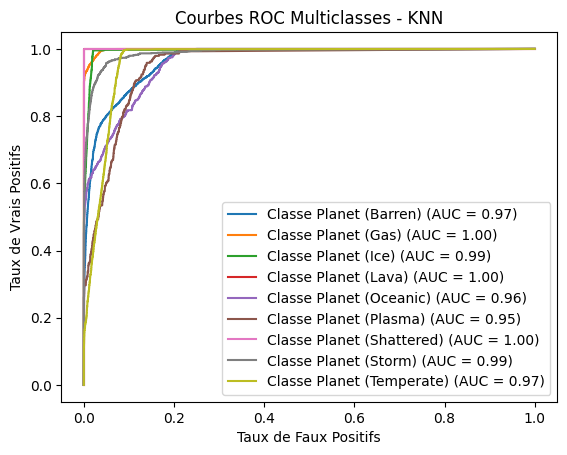

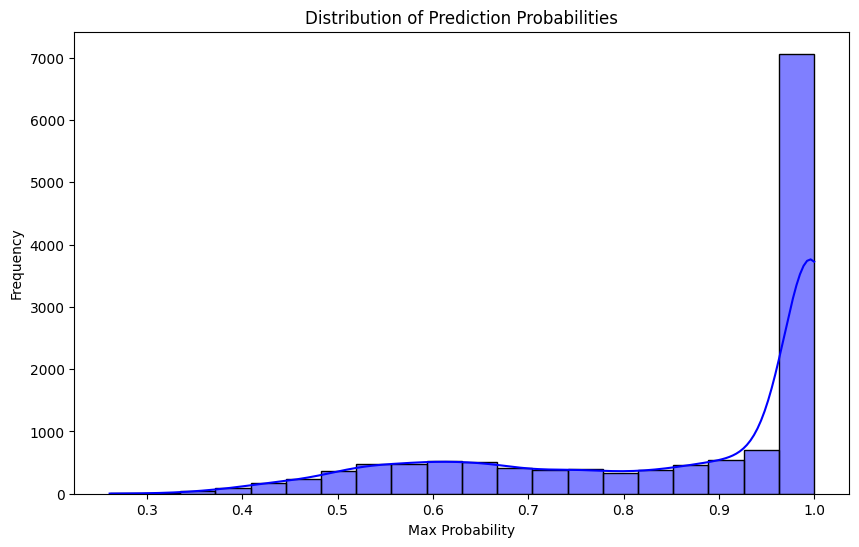

Fichiers sauvegardés dans RF\Without-PCA-CV=3-Variance=0-2025-01-07_10-09-10.zip
Base de données 'data.db' ouverte avec succès dans 'g:\python\Eve projet\Certification XXV\data.db'.
Table 'RF_data' créée ou déjà existante.
Données insérées avec succès dans la table RF_data.


In [ ]:
# Classification = False
Y_Target = 'TypeCoreName'
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust','density','escapeVelocity']
Echantillon_min = 100        # Nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
smote_status = False         # True pour utiliser SMOTE, False pour ne pas utiliser SMOTE
Save_Model = True            # Sauvegarde les paramètres et le modèle dans fichier Zip dans le Répertoire RF 

for i in range(3, 12, 2): 
    CV_data = i  

    param_grid = {
    'n_estimators': [5,10,25, 50,75,100,125,150,200],
    'max_depth': [5, 10, 15, 20,25,30,35,40],
    'min_samples_split': [1,2,5, 10],
    'min_samples_leaf': [1,2,3],
    'max_features': ['sqrt', 'log2']
    }
"""
param_grid = {
'n_estimators': [50],
'max_depth': [10],
'min_samples_split': [5],
'min_samples_leaf': [1],
'max_features': ['sqrt', 'log2']
}
"""    
# On utilise le dataset des planètes voir si la RandomForest donne un résultat plus intéressant que la méthode K-NN
df_data = df_planet.copy()
    
# Grouper par 'TypeCoreName' et compter les occurrences de chaque type
typecore_count = df_planet['TypeCoreName'].value_counts()
typecore_table = typecore_count.to_frame().T  # Vision Horizontal
print(typecore_table)
print(f"\n\n")

# RF_SMOTE(smote_status,df_data,Variance,param_grid,CV_data,X_Chara,Y_Target,XGB_Use,Solver_Type,Echantillon_min,Save_Model,Classification) 
RF_SMOTE2(smote_status,df_data,param_grid,CV_data,X_Chara,Y_Target,Echantillon_min,Save_Model)

In [ ]:
Echantillon_min=100     # Nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
Y_Target = 'TypeCoreName'
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust','density','escapeVelocity']
Smote_State = True     # Activation de la fonction Smote, Rééquilibrage des classes
Weight_Class = False    # Activation du poids des classes
Adjust_Factor = 1.5     # Facteur d'ajustement pour le poids des classes (Seul deux classes sont impactées) Barren et Oceanic
Epoque = 200            # Nombre d'époques    
batch_size_nbr = 64     # Taille du batch
Learning_Rate = 0.0010  # Taux d'apprentissage
Save_Model = True       # Sauvegarde les paramètres et le modèle dans fichier Zip dans le Répertoire DP


Deep(Smote_State,df_planet,Echantillon_min,Y_Target,X_Chara,Weight_Class,Adjust_Factor,Epoque,batch_size_nbr,Learning_Rate,Save_Model)